In [5]:
# The 'Pandas' package is a fast, flexible tool used to analyze data. It helps in reading and updating the files like csv files, excel, etc.
import pandas as pd


# NumPy is used to deal with matrix
import numpy as np

# A regular expression (or RE) specifies a set of strings that matches it.
# The module has functions in this module that let you check if a particular string matches a given regular expression or string.
import re

# The collection Module in Python provides different types of containers.
# Counter is used to store the frequency or count of words in corpus.
from collections import Counter

In [6]:
with open('Oxford English Dictionary.txt', 'r', encoding='utf-8', errors='ignore') as f: # encoding used to encode data to text
    file = f.readlines()
    
# print(file)
# First run this "jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10" in terminal or remove print statement
# This happens when something is printed at high rate or sometimes while loading images

In [7]:
words = []
for line in file:
    line = re.sub('[0-9]*',"",line)      # Removing all strings containing numbers
    line = line.strip().lower()          # Strip() removes the blank spaces and lower() converts the text in lower case
    word = re.findall(r'\w+', line)      # Extracting all words from data
    words.extend(word)
    
vocab = set(words)
print("Length of vocabulary:", len(vocab))
print(vocab)

Length of vocabulary: 51102
{'crumbled', 'pushtu', 'capio', 'evidence', 'landloper', 'capitular', 'dilated', 'repeatedly', 'sprit', 'militarily', 'rates', 'creta', 'legalism', 'nitro', 'signaller', 'tonelessly', 'candidly', 'spoil', 'cantabrigia', 'diagnostic', 'floral', 'carotene', 'fizzy', 'ordering', 'dhoti', 'astrophysical', 'mandolin', 'negligee', 'toy', 'siam', 'motorize', 'uncongenial', 'noxa', 'lawyer', 'golfer', 'prasso', 'westernmost', 'playwright', 'resides', 'pilus', 'groan', 'morose', 'sleepiness', 'withhold', 'diakonos', 'puses', 'touchingly', 'tortuously', 'exposed', 'mountain', 'defending', 'tighten', 'stringently', 'gust', 'hyphenated', 'tenth', 'astutely', 'thereabout', 'dresses', 'vect', 'mantri', 'overlaying', 'traveler', 'paramedical', 'cable', 'steort', 'nne', 'vegetal', 'birthing', 'exit', 'outang', 'familiarize', 'dramatics', 'oleander', 'aitia', 'cheerful', 'centennial', 'tasteful', 'haywire', 'strabos', 'grisel', 'pinus', 'granulate', 'abdication', 'creditors'

In [8]:
# Count the frequency of words and hence, find probability

word_count_dic = {}                     # Key is the word and value is it's frequency in corpus
word_count_dic = Counter(words)         
# It gives the frequency count of each word. If searched for some missing word it returns zero.
# It has the capability to remember the insertion order
print("Number of unique words:", len(word_count_dic))

# Find probabilities
prob = {}
total = len(words) + 1               # 1 is added because total can't be zero
    
for word in word_count_dic.keys():
    prob[word] = round(word_count_dic[word]/total, 6)   # Store probability of each word as value and word as key

Number of unique words: 51102


,Words,Probability
20,n,0.042431
63,of,0.039258
0,a,0.036727
124,or,0.032072
69,the,0.019319


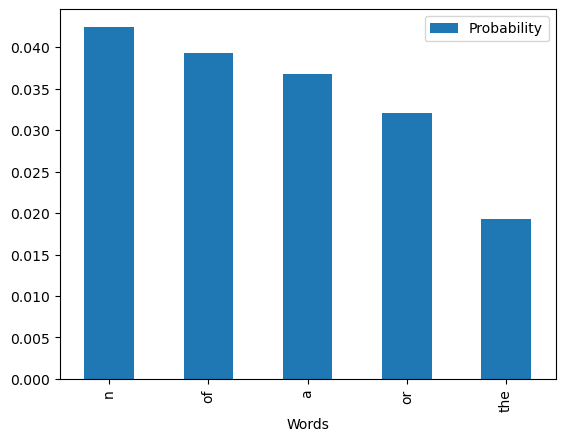

In [9]:
# Store the probability in dataframe and visualize the data

# Sort by the probability 
prob_data = pd.DataFrame({'Words':prob.keys(), 'Probability':prob.values()}).sort_values(by = 'Probability', ascending = False)
prob_data.head().plot.bar(x='Words', y='Probability')           
prob_data.head()                     # Returns first 5 elements      

In [10]:
prob_data.tail()                 # Returns last 5 elements      

,Words,Probability
15337,clemens,0.000001
15338,clementine,0.000001
15341,clenching,0.000001
33714,lugworm,0.000001
51101,zugotos,0.000001


In [11]:
# Identify the wrong words

def find_wrong_words(string):
    wrong_words = []
    
    # strip() function removes the leading and trailing whitespaces
    # lower() function converts all aplhabests to lowercase
    # split() function splits the sentance from every space
    string = string.strip().lower().split(" ")           # Got list of words in sentance/string
    
    for word in string:
        if word not in vocab:
            wrong_words.append(word)
    
    return wrong_words
    
# Example how above function works
wrong = find_wrong_words("I am oky")
print(wrong)

['oky']


In [12]:
# Function insert a letter at different places of word

def insert_letter(word):
    insert_list = []
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    
    split_list = [(word[:i], word[i:]) for i in range(len(word)+1)]
    
    for s in split_list:
        for l in letters:
            insert_list.append(s[0]+l+s[1])
            
    return insert_list

# Example
print(insert_letter('va'))

['ava', 'bva', 'cva', 'dva', 'eva', 'fva', 'gva', 'hva', 'iva', 'jva', 'kva', 'lva', 'mva', 'nva', 'ova', 'pva', 'qva', 'rva', 'sva', 'tva', 'uva', 'vva', 'wva', 'xva', 'yva', 'zva', 'vaa', 'vba', 'vca', 'vda', 'vea', 'vfa', 'vga', 'vha', 'via', 'vja', 'vka', 'vla', 'vma', 'vna', 'voa', 'vpa', 'vqa', 'vra', 'vsa', 'vta', 'vua', 'vva', 'vwa', 'vxa', 'vya', 'vza', 'vaa', 'vab', 'vac', 'vad', 'vae', 'vaf', 'vag', 'vah', 'vai', 'vaj', 'vak', 'val', 'vam', 'van', 'vao', 'vap', 'vaq', 'var', 'vas', 'vat', 'vau', 'vav', 'vaw', 'vax', 'vay', 'vaz']


In [13]:
# Function deletes one letter from different places 

def delete_letter(word):
    delete_list = []
    
    split_list = [(word[:i], word[i:]) for i in range(len(word))]
    
    delete_list = [s[0]+s[1][1:] for s in split_list]
    
    return delete_list

# Example
print(delete_letter("aiim"))

['iim', 'aim', 'aim', 'aii']


In [14]:
# Function replaces each letter of word with different letters

def replace_letter(word):
    replace_list = []
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    
    split_list = [(word[:i], word[i:]) for i in range(len(word))]
    
    for s in split_list:
        if len(s[1]) == 1:
              for l in letters:
                    if l != s[1][0]:
                        replace_list.append(s[0]+l)
        else:
            for l in letters:
                if l != s[1][0]:
                    replace_list.append(s[0]+l+s[1][1:])
            
    return replace_list

# Example
print(replace_letter('sein'))

['aein', 'bein', 'cein', 'dein', 'eein', 'fein', 'gein', 'hein', 'iein', 'jein', 'kein', 'lein', 'mein', 'nein', 'oein', 'pein', 'qein', 'rein', 'tein', 'uein', 'vein', 'wein', 'xein', 'yein', 'zein', 'sain', 'sbin', 'scin', 'sdin', 'sfin', 'sgin', 'shin', 'siin', 'sjin', 'skin', 'slin', 'smin', 'snin', 'soin', 'spin', 'sqin', 'srin', 'ssin', 'stin', 'suin', 'svin', 'swin', 'sxin', 'syin', 'szin', 'sean', 'sebn', 'secn', 'sedn', 'seen', 'sefn', 'segn', 'sehn', 'sejn', 'sekn', 'seln', 'semn', 'senn', 'seon', 'sepn', 'seqn', 'sern', 'sesn', 'setn', 'seun', 'sevn', 'sewn', 'sexn', 'seyn', 'sezn', 'seia', 'seib', 'seic', 'seid', 'seie', 'seif', 'seig', 'seih', 'seii', 'seij', 'seik', 'seil', 'seim', 'seio', 'seip', 'seiq', 'seir', 'seis', 'seit', 'seiu', 'seiv', 'seiw', 'seix', 'seiy', 'seiz']


In [15]:
# Function swaps two adjacent letters of different places

def switch_letter(word):
    switch_list = []
    
    split_list = [(word[:i], word[i:]) for i in range(len(word))]
    
    for s in split_list:
        if len(s[1]) > 2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        
        switch_list.append(temp)
        
    return switch_list

# Example
switch_letter("mtea")

['tmea', 'meta', 'mtae', 'mtae']

In [16]:
# Function edit only one letter of the word

def edit_one_letter(word):
    edit_one = set()
    
    insert_list = insert_letter(word)
    delete_list = delete_letter(word)
    replace_list = replace_letter(word)
    switch_list = switch_letter(word)
    
    edit_one = set(insert_list + delete_list + replace_list + switch_list)
    
    return edit_one

In [17]:
# Function edit two letter of the word

def edit_two_letter(word):
    edit_two = set()
    
    one_edit = edit_one_letter(word)
    ans = []
    
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))
        
    edit_two = set(ans)
    
    return edit_two    

In [18]:
# Get possible corrections after inserting, deleting, switching, replacing letters

def get_corrections(word, n):                   # n is the number of corrections we want
    suggested = []
    best_words ={}                              # Most probable words after correction
    
    for w in edit_one_letter(word):
        if len(suggested) == n:
            break
            
        if w in prob.keys():
            suggested.append(w)
            
    for w in edit_two_letter(word):
        if len(suggested) == n:
            break
            
        if w in prob.keys():
            suggested.append(w)
     
    for wrd in suggested:
        best_words[wrd] = prob[wrd]
        
    best_words = sorted(best_words.items(), key = lambda x: x[1], reverse = True)   
    # lambda creates an inline function, x[1] means sorting to be done on the basis of second element of dictionary(i.e. value)
      
    return best_words

# Example
print(get_corrections("immer",30))

[('ier', 0.000874), ('timber', 6.9e-05), ('inner', 6.3e-05), ('summer', 3.6e-05), ('imper', 3.5e-05), ('mime', 1.7e-05), ('immerse', 1.3e-05), ('inter', 1.2e-05), ('limber', 1e-05), ('swimmer', 1e-05), ('miser', 9e-06), ('impel', 9e-06), ('amber', 6e-06), ('homer', 6e-06), ('dimmer', 4e-06), ('mummer', 4e-06), ('zimmer', 3e-06), ('simmer', 3e-06), ('isomer', 3e-06), ('ember', 3e-06), ('impero', 3e-06), ('glimmer', 3e-06), ('imbed', 3e-06), ('comer', 3e-06), ('miler', 1e-06), ('immure', 1e-06), ('grimmer', 1e-06), ('trimmer', 1e-06)]


In [19]:
# Function returns the most probable word

def get_correct_word(word):
    corrections = get_corrections(word, 20)     # 20 is the number of corrections we want
    
    if len(corrections) == 0:
        return word
    
    final_word = corrections[0][0]
    max_prob = 0
    
    for w, p in corrections:
        if p > max_prob:
            max_prob = p
            final_word = w
            
    return final_word
        

In [20]:
# Function autocorrect the words

def autocorrect(string):
    wrong_words = find_wrong_words(string)
    print("Wrong words:", wrong_words)
    
    correct_words = []
    for word in string.strip().lower().split(" "):
        if word in wrong_words:
            word = get_correct_word(word)
            
        correct_words.append(word)
        
    print("Output string:", " ".join(correct_words).capitalize())

In [21]:
autocorrect("Birthay day")

Wrong words: ['birthay']
Output string: Birth day


In [23]:
# Input the string

print("Number of string you want to input: ", end="")
n = int(input())

for i in range(n):
    print("Input string: ", end="")
    string = input()
    autocorrect(string)
    
    print("="*100)

Number of string you want to input: 1
Input string: Live pecfully
Wrong words: ['pecfully']
Output string: Live peacefully
